In [1]:
import duckdb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

### Distinct Species as a Function of Time

In [2]:
sql = """
SELECT
    make_date(extract('year' FROM CAST(observation_date AS date)), extract('month' FROM CAST(observation_date AS date)), 1) AS observation_date,
    COUNT(DISTINCT scientific_name) AS species_count
FROM read_parquet([
    'data/ebird_2015.parquet',
    'data/ebird_2016.parquet',
    'data/ebird_2017.parquet',
    'data/ebird_2018.parquet',
    'data/ebird_2019.parquet',
    'data/ebird_2020.parquet',
    'data/ebird_2021.parquet',
    'data/ebird_2022.parquet'])
GROUP BY 1
ORDER BY 1
"""
results = duckdb.sql(sql)

In [3]:
results_df = results.df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [4]:
results_df

observation_date  species_count
0        2015-01-01            990
1        2015-02-01            981
2        2015-03-01           1045
3        2015-04-01           1096
4        2015-05-01           1139
..              ...            ...
91       2022-08-01           1192
92       2022-09-01           1205
93       2022-10-01           1209
94       2022-11-01           1122
95       2022-12-01           1105

[96 rows x 2 columns]

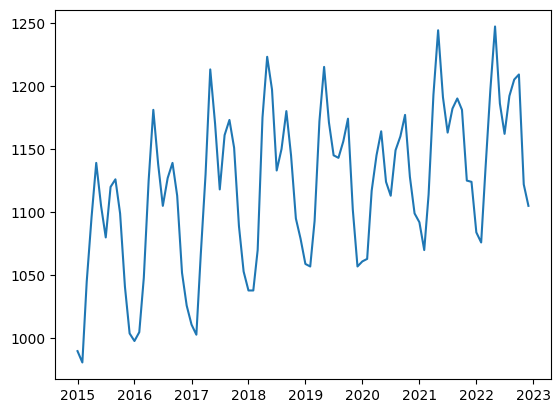

In [5]:
fig, ax = plt.subplots()
ax.plot(results_df['observation_date'], results_df['species_count'])

In [6]:
sql = """
SELECT
    make_date(extract('year' FROM CAST(observation_date AS date)), 7, 1) AS observation_year,
    COUNT(DISTINCT scientific_name) AS species_count
FROM read_parquet([
    'data/ebird_2015.parquet',
    'data/ebird_2016.parquet',
    'data/ebird_2017.parquet',
    'data/ebird_2018.parquet',
    'data/ebird_2019.parquet',
    'data/ebird_2020.parquet',
    'data/ebird_2021.parquet',
    'data/ebird_2022.parquet'])
GROUP BY 1
ORDER BY 1
"""
results = duckdb.sql(sql)
year_results = results.df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [7]:
year_results

observation_year  species_count
0       2015-07-01           1453
1       2016-07-01           1452
2       2017-07-01           1481
3       2018-07-01           1491
4       2019-07-01           1490
5       2020-07-01           1495
6       2021-07-01           1528
7       2022-07-01           1555

Text(0.5, 1.0, 'Distinct Species Observed over Time (USA States)')

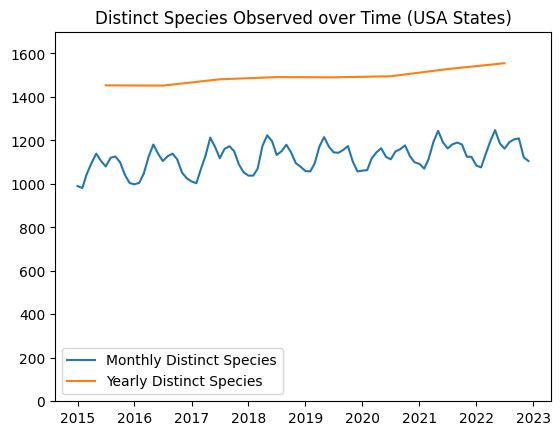

In [8]:
fig, ax = plt.subplots()
ax.plot(results_df['observation_date'], results_df['species_count'], label='Monthly Distinct Species')
ax.plot(year_results['observation_year'], year_results['species_count'], label='Yearly Distinct Species')
ax.set_ylim(0, 1700)
ax.legend()
ax.set_title("Distinct Species Observed over Time (USA States)")

### Birder Counts

In [9]:
sql = """
SELECT
    make_date(extract('year' FROM CAST(observation_date AS date)), extract('month' FROM CAST(observation_date AS date)), 1) AS observation_date,
    COUNT(DISTINCT observer_id) AS observer_count
FROM read_parquet([
    'data/ebird_2015.parquet',
    'data/ebird_2016.parquet',
    'data/ebird_2017.parquet',
    'data/ebird_2018.parquet',
    'data/ebird_2019.parquet',
    'data/ebird_2020.parquet',
    'data/ebird_2021.parquet',
    'data/ebird_2022.parquet'])
GROUP BY 1
ORDER BY 1
"""
results = duckdb.sql(sql)
birder_results = results.df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [10]:
sql = """
SELECT
    make_date(extract('year' FROM CAST(observation_date AS date)), 7, 1) AS observation_year,
    COUNT(DISTINCT observer_id) AS observer_count
FROM read_parquet([
    'data/ebird_2015.parquet',
    'data/ebird_2016.parquet',
    'data/ebird_2017.parquet',
    'data/ebird_2018.parquet',
    'data/ebird_2019.parquet',
    'data/ebird_2020.parquet',
    'data/ebird_2021.parquet',
    'data/ebird_2022.parquet'])
GROUP BY 1
ORDER BY 1
"""
results = duckdb.sql(sql)
year_birder_results = results.df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Text(0.5, 1.0, 'Distinct Birders over Time (USA States)')

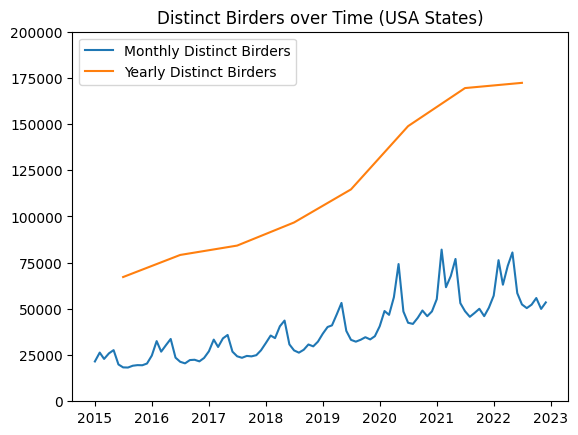

In [11]:
fig, ax = plt.subplots()
ax.plot(birder_results['observation_date'], birder_results['observer_count'], label="Monthly Distinct Birders")
ax.plot(year_birder_results['observation_year'], year_birder_results['observer_count'], label="Yearly Distinct Birders")
ax.set_ylim(0, 200000)
ax.legend()
ax.set_title("Distinct Birders over Time (USA States)")

In [12]:
sql = """
SELECT
        observer_id,
        COUNT(DISTINCT CAST(observation_date AS date)) AS distinct_days_observing
FROM 'data/ebird_2022.parquet'
GROUP BY 1
"""
results = duckdb.sql(sql)
birder_frequency_results = results.df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [13]:
birder_frequency_results.tail()

OBSERVER_ID  distinct_days_observing
172305  obsr2167135                        1
172306  obsr1144121                        1
172307  obsr3067738                        1
172308  obsr2187447                        1
172309  obsr2328920                        1

Text(0.5, 1.0, '2022 Birder Count by Days Observing')

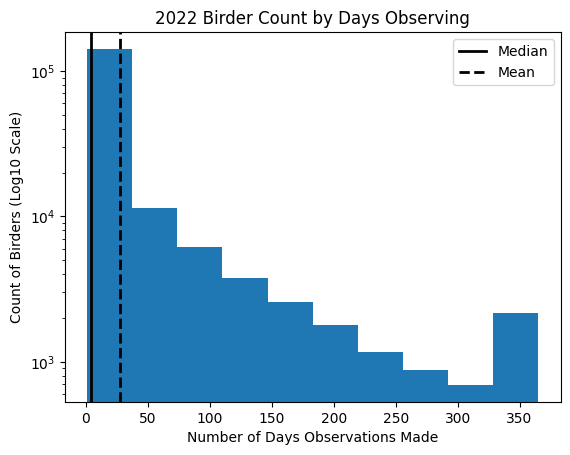

In [66]:
fig, ax = plt.subplots()
ax.hist(birder_frequency_results['distinct_days_observing'])
ax.axvline(birder_frequency_results['distinct_days_observing'].median(), color='black', linewidth=2, label='Median')
ax.axvline(birder_frequency_results['distinct_days_observing'].mean(), linestyle='dashed', color='black', linewidth=2, label='Mean')

ax.set_yscale('log')
ax.set_xlabel("Number of Days Observations Made")
ax.set_ylabel("Count of Birders (Log10 Scale)")
ax.legend()
ax.set_title("2022 Birder Count by Days Observing")

### Duration Minutes

In [32]:
sql = """
SELECT
        observer_id,
        observation_date,
        common_name,
        scientific_name,
        duration_minutes,
        observation_count,
        time_observations_started,
        sampling_event_identifier,
        protocol_type,
        protocol_code
FROM 'data/ebird_2022.parquet'
WHERE observer_id = 'obsr95380'
AND observation_date = '2022-11-25'
ORDER BY DURATION_MINUTES DESC

LIMIT 100
"""
results = duckdb.sql(sql)
test = results.df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [33]:
pd.set_option('display.max_rows', 100)
test

OBSERVER_ID OBSERVATION_DATE               COMMON_NAME  \
0    obsr95380       2022-11-25         Northern Cardinal   
1    obsr95380       2022-11-25                  Ovenbird   
2    obsr95380       2022-11-25                  Blue Jay   
3    obsr95380       2022-11-25            Eastern Phoebe   
4    obsr95380       2022-11-25                Bald Eagle   
5    obsr95380       2022-11-25                House Wren   
6    obsr95380       2022-11-25          Chipping Sparrow   
7    obsr95380       2022-11-25          White-eyed Vireo   
8    obsr95380       2022-11-25           Tufted Titmouse   
9    obsr95380       2022-11-25               Wild Turkey   
10   obsr95380       2022-11-25     Blue-gray Gnatcatcher   
11   obsr95380       2022-11-25       Boat-tailed Grackle   
12   obsr95380       2022-11-25               Green Heron   
13   obsr95380       2022-11-25        Eastern Meadowlark   
14   obsr95380       2022-11-25         Blue-headed Vireo   
15   obsr95380       2022-11-25            Sandhill Crane   
16   obsr95380       2022-11-25     Yellow-rumped Warbler   
17   obsr95380       2022-11-25          Downy Woodpecker   
18   obsr95380       2022-11-25   Yellow-throated Warbler   
19   obsr95380       2022-11-25     Yellow-rumped Warbler   
20   obsr95380       2022-11-25      Northern Mockingbird   
21   obsr95380       2022-11-25       Pileated Woodpecker   
22   obsr95380       2022-11-25               Great Egret   
23   obsr95380       2022-11-25    Red-bellied Woodpecker   
24   obsr95380       2022-11-25          Northern Flicker   
25   obsr95380       2022-11-25              Gray Catbird   
26   obsr95380       2022-11-25              Palm Warbler   
27   obsr95380       2022-11-25                 Fish Crow   
28   obsr95380       2022-11-25                Wood Stork   
29   obsr95380       2022-11-25            Common Grackle   
30   obsr95380       2022-11-25       Common Yellowthroat   
31   obsr95380       2022-11-25      Ruby-crowned Kinglet   
32   obsr95380       2022-11-25                  Killdeer   
33   obsr95380       2022-11-25            American Robin   
34   obsr95380       2022-11-25             Black Vulture   
35   obsr95380       2022-11-25        Common Ground Dove   
36   obsr95380       2022-11-25   Black-and-white Warbler   
37   obsr95380       2022-11-25       Red-shouldered Hawk   
38   obsr95380       2022-11-25             American Crow   
39   obsr95380       2022-11-25              Palm Warbler   
40   obsr95380       2022-11-25         Little Blue Heron   
41   obsr95380       2022-11-25              Pine Warbler   
42   obsr95380       2022-11-25         American Redstart   
43   obsr95380       2022-11-25              Palm Warbler   
44   obsr95380       2022-11-25             Mourning Dove   
45   obsr95380       2022-11-25  Yellow-bellied Sapsucker   
46   obsr95380       2022-11-25         Loggerhead Shrike   
47   obsr95380       2022-11-25            Turkey Vulture   
48   obsr95380       2022-11-25          White-eyed Vireo   
49   obsr95380       2022-11-25            American Robin   
50   obsr95380       2022-11-25         American Redstart   
51   obsr95380       2022-11-25    Red-bellied Woodpecker   
52   obsr95380       2022-11-25     Yellow-rumped Warbler   
53   obsr95380       2022-11-25             Hermit Thrush   
54   obsr95380       2022-11-25            Sandhill Crane   
55   obsr95380       2022-11-25   Black-and-white Warbler   
56   obsr95380       2022-11-25                House Wren   
57   obsr95380       2022-11-25           Prairie Warbler   
58   obsr95380       2022-11-25          Downy Woodpecker   
59   obsr95380       2022-11-25              Gray Catbird   
60   obsr95380       2022-11-25                  Ovenbird   
61   obsr95380       2022-11-25            Eastern Phoebe   
62   obsr95380       2022-11-25   Yellow-throated Warbler   
63   obsr95380       2022-11-25             Carolina Wren   
64   obsr95380       2022-11-25     Bl

In [45]:
sql = """
WITH distinct_observation_minutes AS
(
    SELECT
            observer_id,
            observation_date,
            time_observations_started,
            COALESCE(MAX(duration_minutes), 1) as observation_minutes
    FROM read_parquet(
        ['data/ebird_2015.parquet',
        'data/ebird_2016.parquet',
        'data/ebird_2017.parquet',
        'data/ebird_2018.parquet',
        'data/ebird_2019.parquet',
        'data/ebird_2020.parquet',
        'data/ebird_2021.parquet',
        'data/ebird_2022.parquet'])
    GROUP BY 1,2,3
)

SELECT
    make_date(extract('year' FROM CAST(observation_date AS date)), extract('month' FROM CAST(observation_date AS date)), 1) AS observation_month,
    sum(observation_minutes) as total_observation_minutes
FROM distinct_observation_minutes
GROUP BY 1
"""
results = duckdb.sql(sql)
duration_df = results.df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [73]:
duration_df = duration_df.sort_values(by='observation_month')
duration_df['total_observation_hours'] = duration_df['total_observation_minutes'] / 60
duration_df['millions_observation_hours'] = duration_df['total_observation_minutes'] / 60 / 1000000

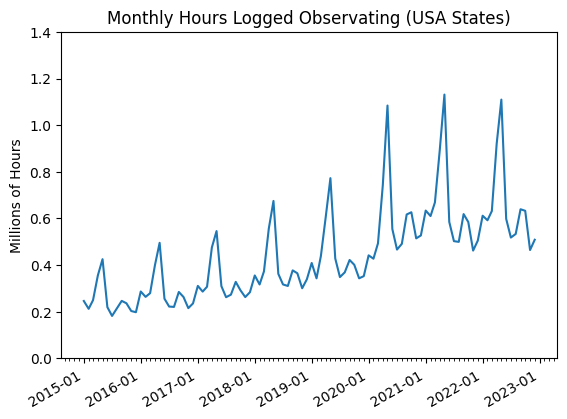

In [76]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y-%m')
fmt_month = mdates.MonthLocator()

fig, ax = plt.subplots()
ax.plot(duration_df['observation_month'], duration_df['millions_observation_hours'], label="Monthly Observation Hours")
ax.set_ylim(0, 1.4)
ax.set_ylabel("Millions of Hours")
ax.set_title("Monthly Hours Logged Observating (USA States)")
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_minor_locator(fmt_month)
fig.autofmt_xdate()
